In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `imshow` mode scenario of `plot_image` function.

For valid parameters info address `MatplotlibPlotter.imshow` documentation.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_image

In [3]:
# Sample data generation
shape = (50, 50)
image = np.random.rand(*shape)

To plot an image, simply pass an array to universal plotting function.

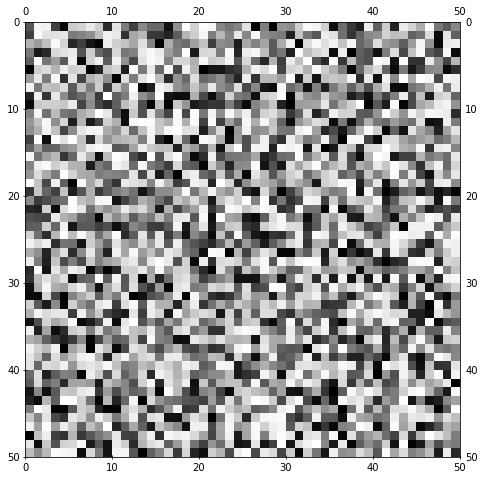

In [4]:
plot_image(image)

To annotate an image use parameters for correponding `matplotlib` functions.

If parameter name collision occurs, simply prefix it with specific method alias followed by underscore.

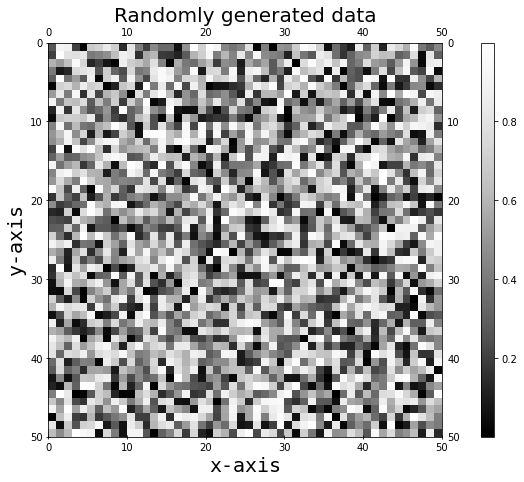

In [5]:
annotation_params = {
    'title_label': 'Randomly generated data',
    'xlabel': 'x-axis',
    'title_fontsize': 20,
    'ylabel': 'y-axis',
    'colorbar': True,
    'family': 'monospace',
    # using prefix, one can redirect parameter to specific annotation method
    'title_family': 'sans-serif'
}

plot_image(image, **annotation_params)

To change default image display parameters use arguments valid for `plt.imshow`.

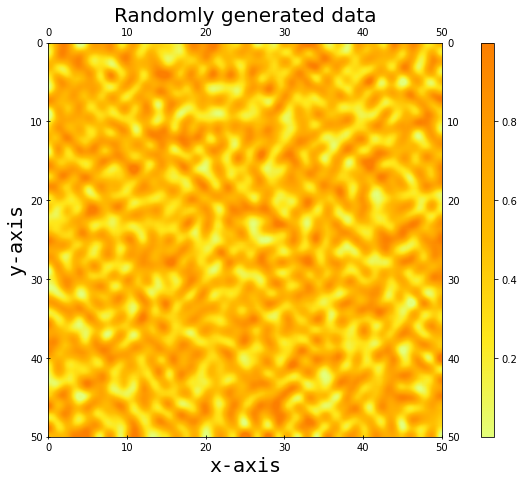

In [6]:
image_params = {
    'cmap': 'Wistia',
    'interpolation': 'bessel'
}

plot_image(image, **image_params, **annotation_params)

In [7]:
# Sample mask generation.
mask_0 = np.ones(shape)
mask_0[image > 0.5] = np.nan

To overlay images one over another pass them in a list to universal plotting function.

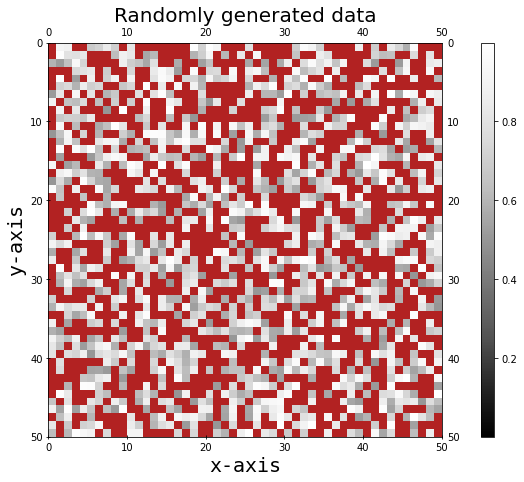

In [8]:
plot_image([image, mask_0], **annotation_params)

In [9]:
# Sample mask generation.
mask_1 = np.ones(shape)
mask_1[image > 0.25] = np.nan

One can overlay up to 6 images without specifing additional plot parameters (after 6 images defaults colors list is exausted)

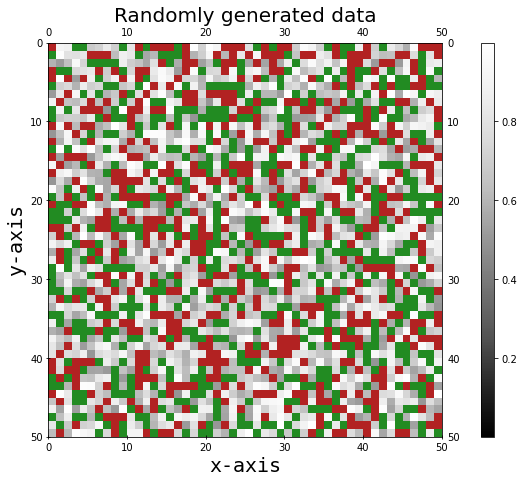

In [10]:
plot_image([image, mask_0, mask_1], **annotation_params)

If only one parameter is provided for several images, all of them are displayed with it.

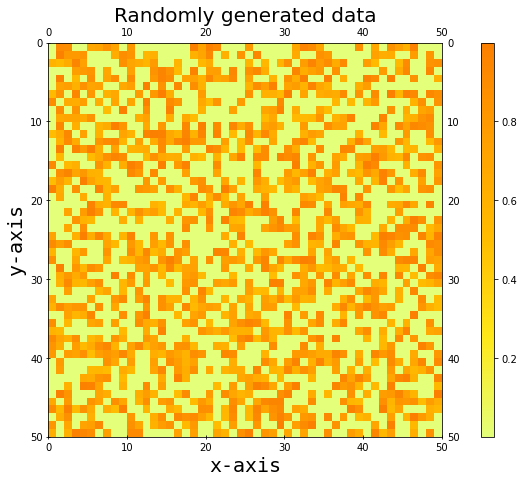

In [11]:
image_params = {
    'cmap': 'Wistia'
}

plot_image([image, mask_0, mask_1],
           **image_params,
           **annotation_params)

To specify parameter for every image layer, use lists of the same length as your data is.

Note that valid matplotlib colors act as single-color cmaps, which is useful for binary mask display.

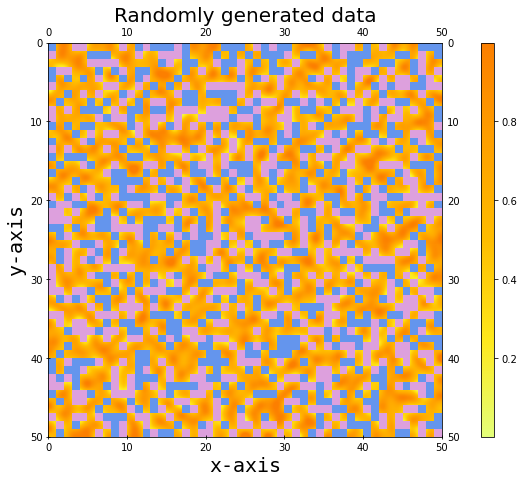

In [12]:
image_params = {
    'cmap': ['Wistia', 'cornflowerblue', 'plum'],
    'interpolation': ['bessel', None, None]
}

plot_image([image, mask_0, mask_1],
           **image_params,
           **annotation_params)

If one does not specify legend colors explicitly (i.e. with `'legend_'` prefix), legend labels are created only for layers displayed in a single color.

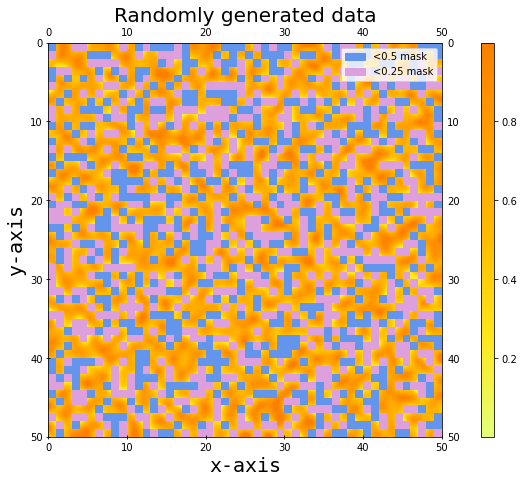

In [13]:
annotation_params['legend_label'] = ['<0.5 mask', '<0.25 mask']

plot_image([image, mask_0, mask_1],
           **image_params,
           **annotation_params)

To display given images separately, use `separate` bool flag.

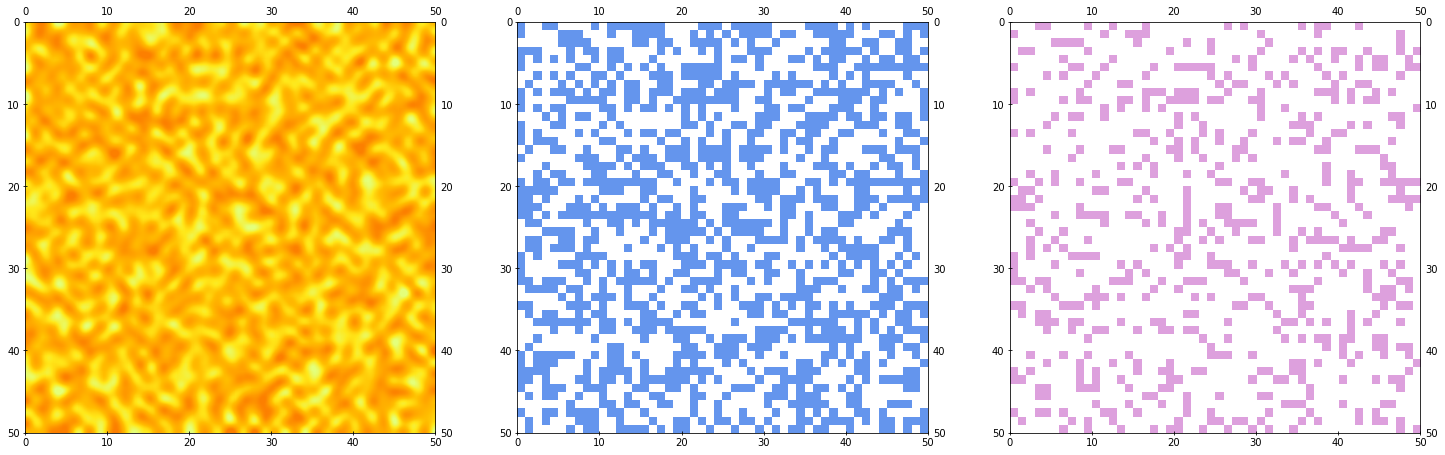

In [14]:
figure_params = {'figsize': (25, 10)}

plot_image([image, mask_0, mask_1], separate=True, **image_params, **figure_params)

Some parameters have one or more aliases (e.g. to pass title label value one can use `title_label`, `title` or `label` keywords)

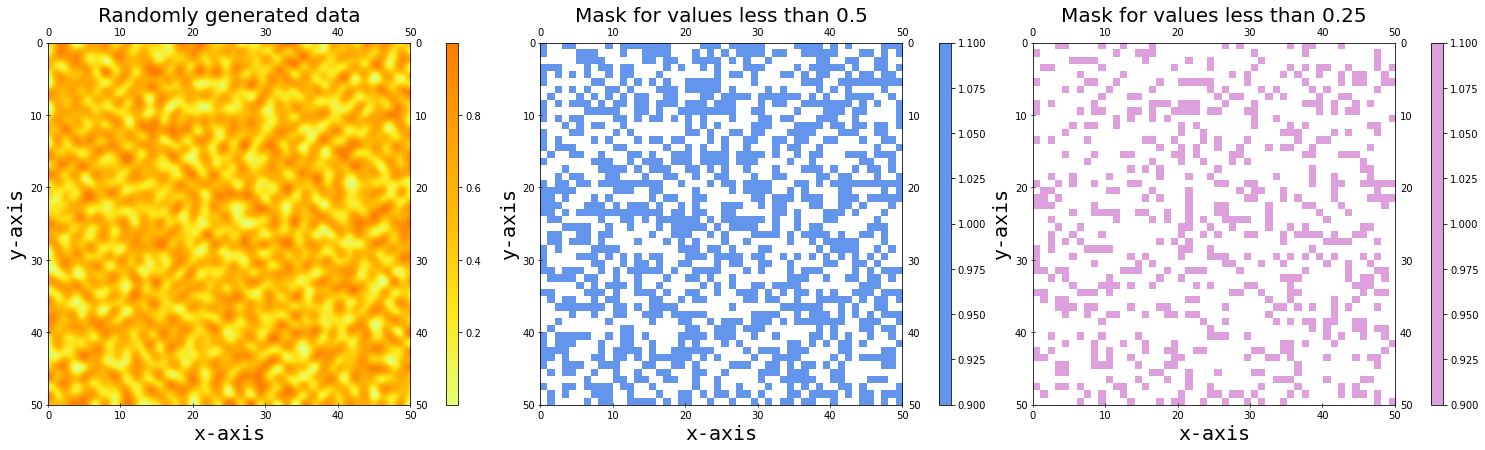

In [15]:
annotation_params['title'] = ['Randomly generated data',
                              'Mask for values less than 0.5',
                              'Mask for values less than 0.25']
annotation_params['legend_label'] = None

plot_image([image, mask_0, mask_1],
           separate=True,
           **figure_params,
           **image_params,
           **annotation_params)

Colorbar can be disabled for chosen images.

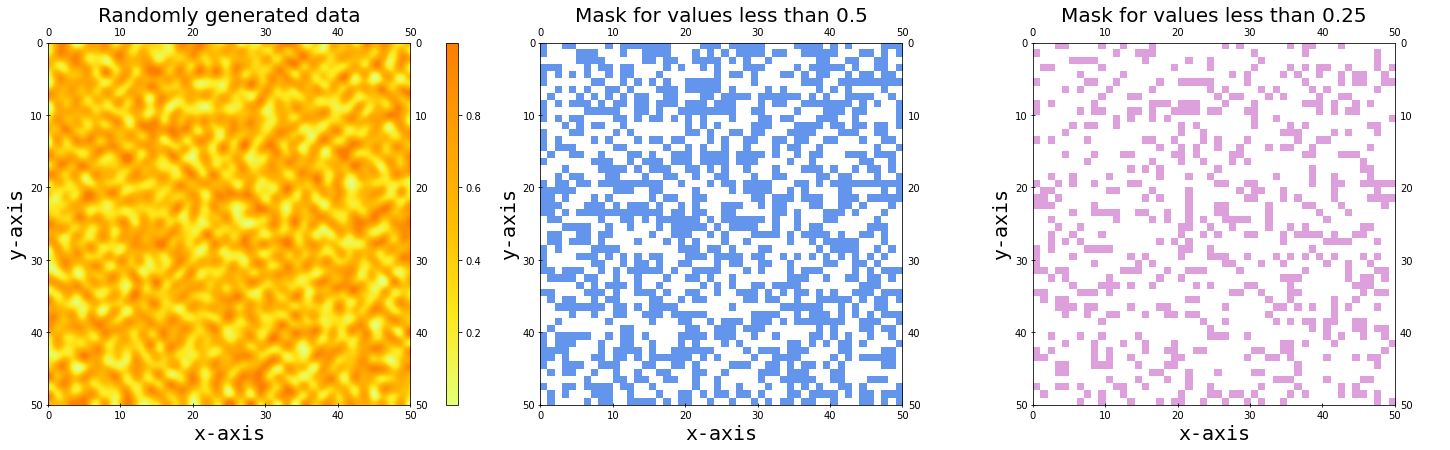

In [16]:
annotation_params['colorbar'] = [True, False, False]

plot_image([image, mask_0, mask_1],
           separate=True,
           **figure_params,
           **image_params,
           **annotation_params)

To display images in 'mixed' manner, i.e. with some image overlaid and some displayed separately, use nested lists of image arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

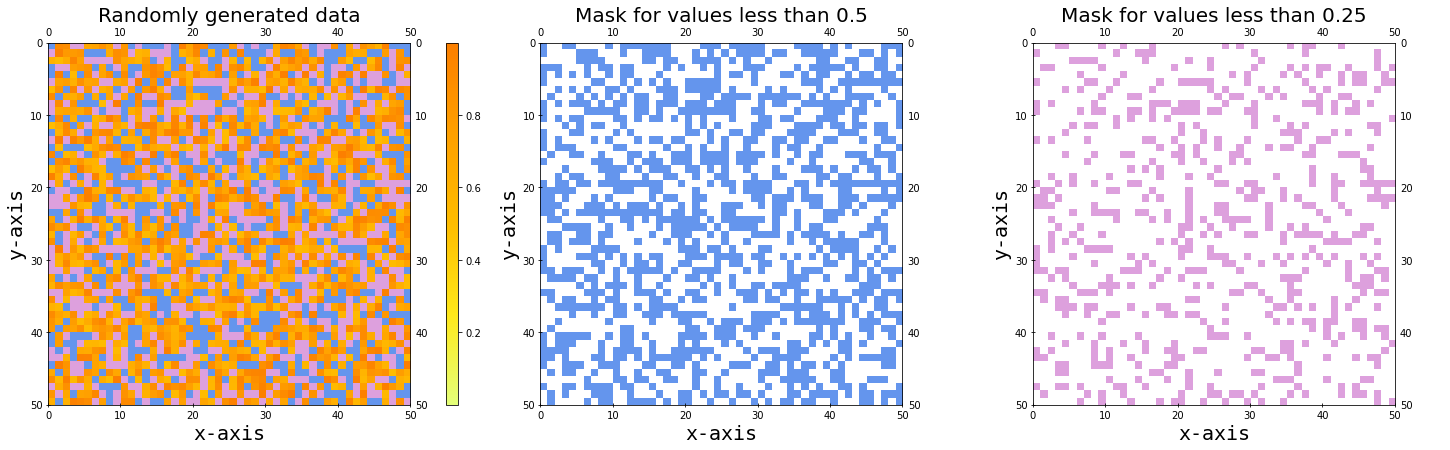

In [17]:
image_params = {'cmap' : [['Wistia', 'cornflowerblue', 'plum'], ['cornflowerblue'], ['plum']]}

plot_image([[image, mask_0, mask_1], mask_0, mask_1],
           **figure_params,
           **image_params,
           **annotation_params)

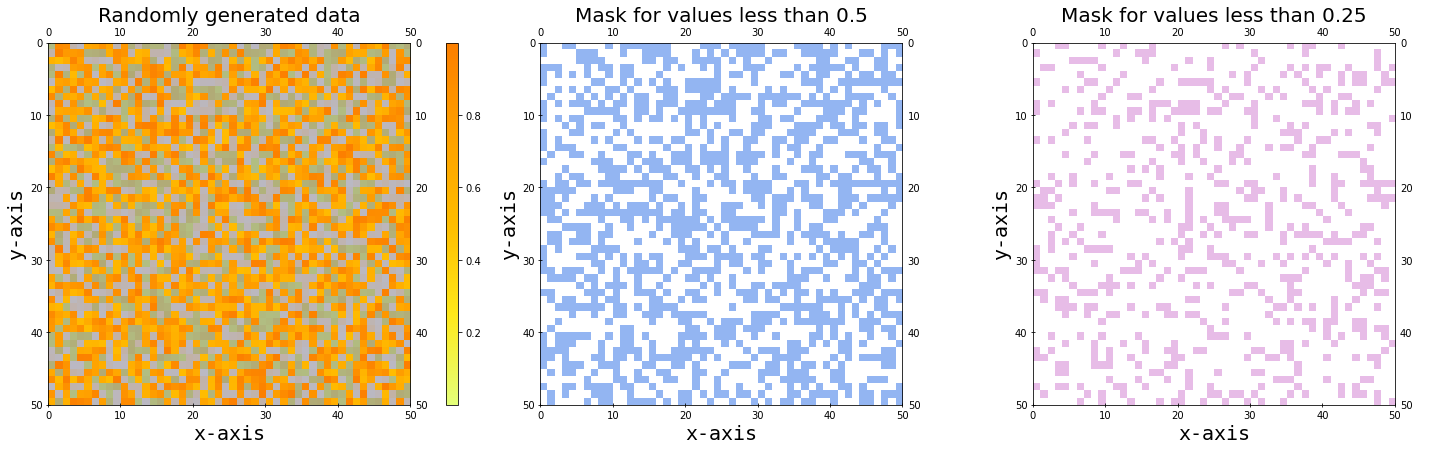

In [18]:
image_params['alpha'] = [[1., .5, .4], [.7], [.7]]

plot_image([[image, mask_0, mask_1], mask_0, mask_1],
           **figure_params,
           **image_params,
           **annotation_params)

Universal plotting functions manages axes creation if none provided.

Using valid `plt.subplots` parameters one can create a grid of images with desired proportions.

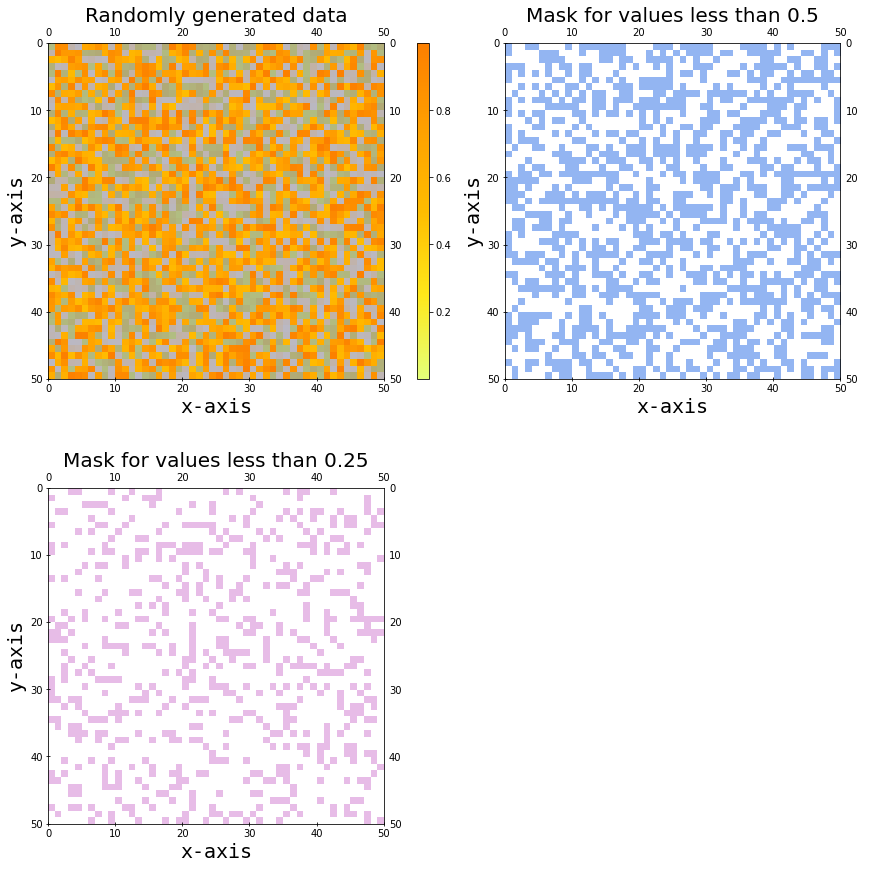

In [19]:
figure_params = {
    'ncols': 2,
    'nrows': 2,
    'figsize': (15, 15)
}

plot_image([[image, mask_0, mask_1], mask_0, mask_1],
           **figure_params,
           **image_params,
           **annotation_params)

One better use `return_figure` bool flag to obtain resulting figure.

However, last displayed figure is also available under `last_figure` attribute of `plot_image`.

Both approaches might be used to put additional data on already created axes. 

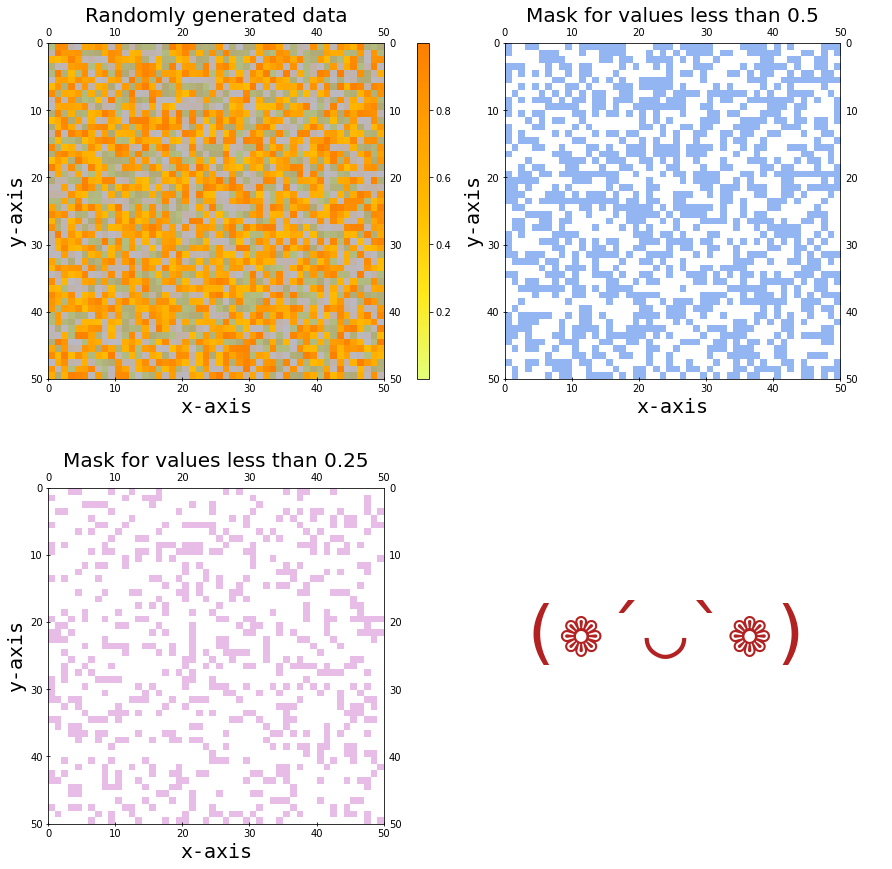

In [20]:
plot_image.last_figure.axes[-1].text(9, .5, '(❁´◡`❁)', fontsize=70, color='firebrick', family='monospace')
plot_image.last_figure